In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import time

import paper.eval as eval
from paper.DPAH_multiple_minorities import DPAH

## model parameters

In [16]:
# Number of nodes
N = 40

# max edge density
d = 0.02

# Top beta% of rankings to consider for inequity
beta = 0.05

# Top k nodes to consider for inequity. k = N * beta
k = int(N * beta)

# Minority fractions
fm1 = 0.2
fm2 = 0.2

# Activity distribution parameters
plo_M = 2
plo_m1 = 2
plo_m2 = 2

# homophily
h_MM = 0.9
h_Mm = (1.0 - h_MM)/2.0
h_within = 0.7
h_between = 0.25
h_mM = (1.0 - h_within - h_between)

h = [[h_MM, h_Mm, h_Mm],
    [h_mM, h_within, h_between],
    [h_mM, h_between, h_within]]

## experiment parameters

In [17]:
runs = 1

## experiments

In [18]:
graphs = []
start_time = time.time()

for i in range(runs):
    g = DPAH(N=N, d=d, fm1=fm1, fm2=fm2, plo_M=plo_M, plo_m1=plo_m1, plo_m2=plo_m2, h=h, verbose=False, seed=i)
    graphs.append(g)
    
end_time = time.time()
print("finished {} run(s) with {} nodes each in {} seconds".format(runs, N, str(round((end_time - start_time), 2))))

finished 1 run(s) with 40 nodes each in 0.02 seconds


## analysis

In [20]:
def draw_graph(g):
    maj_nodelist = []
    min1_nodelist = []
    min2_nodelist = []

    for i in range(len(g.nodes)):
        group = g.nodes[i]['m']
        if group == 0:
            maj_nodelist.append(i)
        elif group == 1:
            min1_nodelist.append(i)
        elif group == 2:
            min2_nodelist.append(i)
        else:
            print("ERROR: group", group)

    subax2 = plt.subplot()
    pos = nx.circular_layout(g)
    nx.draw_networkx(g, nodelist=maj_nodelist, pos=pos, with_labels=False, node_size= 50, node_color='#B6312C')
    nx.draw_networkx(g, nodelist=min1_nodelist, pos=pos, with_labels=False, node_size= 50, node_color='#84CAE7')
    nx.draw_networkx(g, nodelist=min2_nodelist, pos=pos, with_labels=False, node_size= 50, node_color='#136F63')

    plt.show()

DiGraph named 'DPAH' with 40 nodes and 31 edges


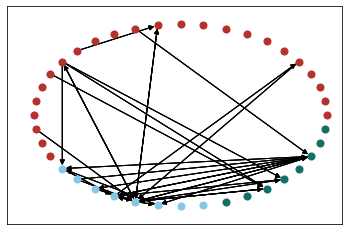

average clustering coefficient: 0.126


In [21]:
#investigate graph... check to see what nx can do
for g in graphs:
    print(g)
    draw_graph(g)
    print("average clustering coefficient:", round(nx.algorithms.average_clustering(g),3))